# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import mode
import scipy

# Import data set

In [2]:
dataset = pd.read_csv('money.csv')

In [3]:
dataset

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


# Scatter plot matrix

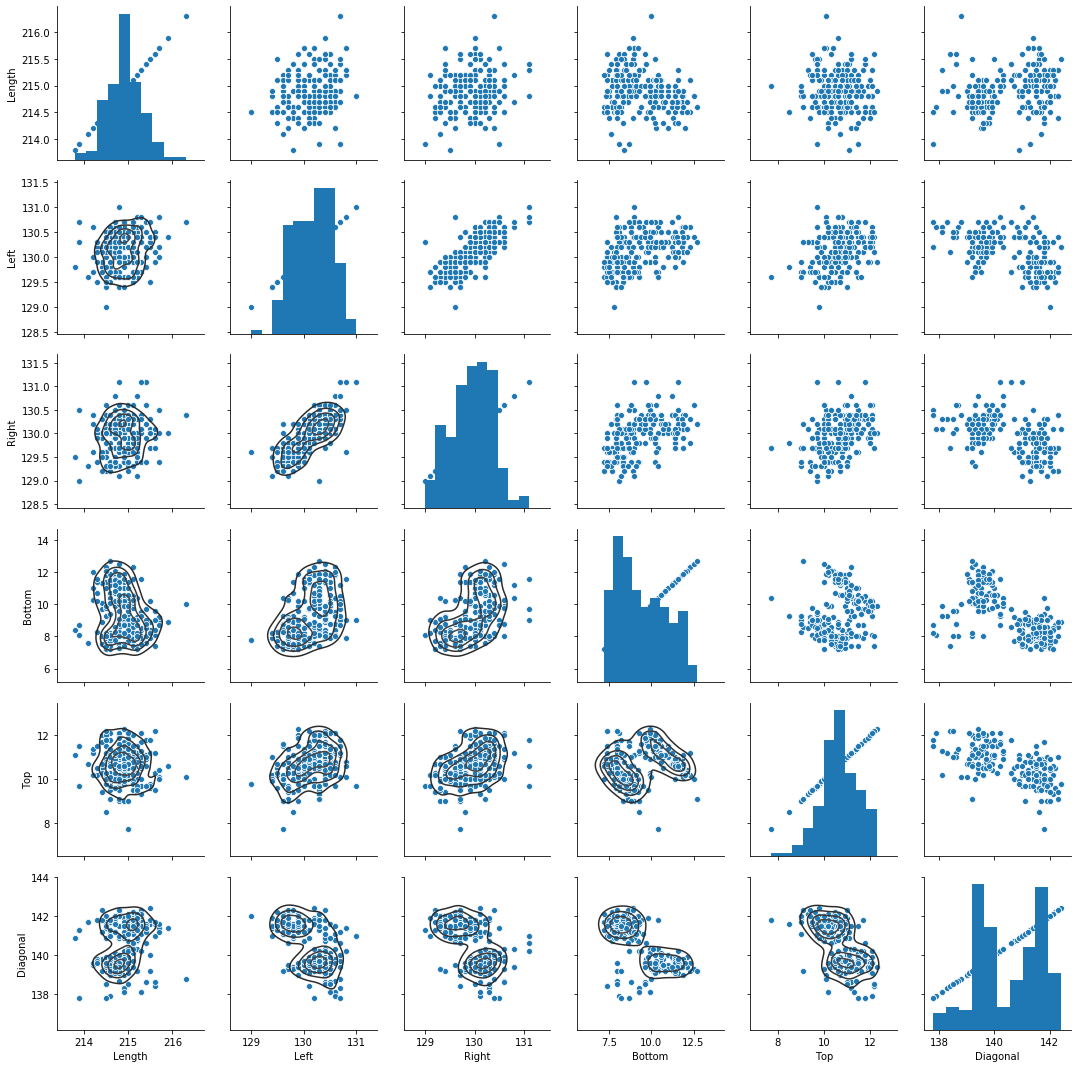

In [4]:
import seaborn as sns

g = sns.pairplot(dataset)
g.map_lower(sns.kdeplot, levels=4, color=".3")
g.map(sns.scatterplot)

plt.savefig('Splom.png', transparent=True)

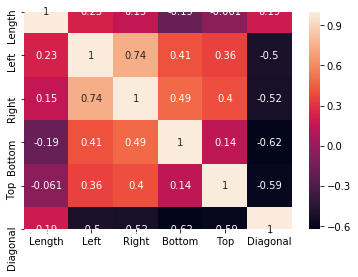

In [5]:
correlation_mat = dataset.corr()

graph = sns.heatmap(correlation_mat, annot = True)

plt.savefig('correlation.png')
plt.show(graph)

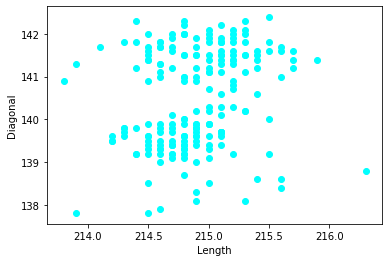

In [6]:
plt.scatter(dataset["Length"], dataset["Diagonal"], color = "cyan")
plt.xlabel('Length')
plt.ylabel('Diagonal')
plt.savefig('Length-Diagonal.png', transparent=True)
plt.show()

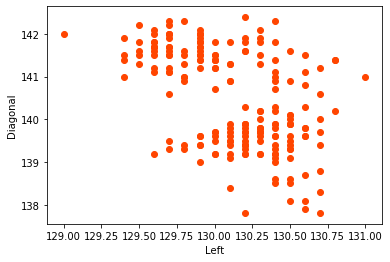

In [7]:
plt.scatter(dataset["Left"], dataset["Diagonal"], color = "orangered")
plt.xlabel('Left')
plt.ylabel('Diagonal')
plt.savefig('Left-Diagonal.png', transparent=True)
plt.show()

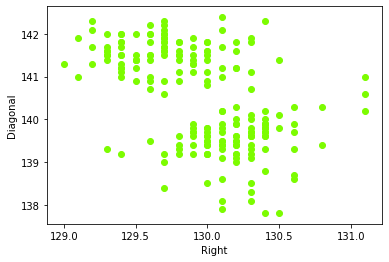

In [8]:
plt.scatter(dataset["Right"], dataset["Diagonal"], color = "lawngreen")
plt.xlabel('Right')
plt.ylabel('Diagonal')
plt.savefig('Right-Diagonal.png', transparent=True)
plt.show()

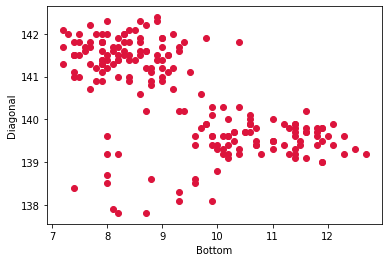

In [9]:
plt.scatter(dataset["Bottom"], dataset["Diagonal"], color = "crimson")
plt.xlabel('Bottom')
plt.ylabel('Diagonal')
plt.savefig('Bottom-Diagonal.png', transparent=True)
plt.show()

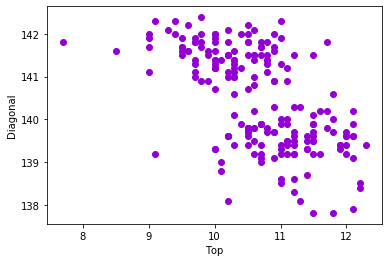

In [10]:
plt.scatter(dataset["Top"], dataset["Diagonal"], color = "darkviolet")
plt.xlabel('Top')
plt.ylabel('Diagonal')
plt.savefig('Top-Diagonal.png', transparent=True)
plt.show()

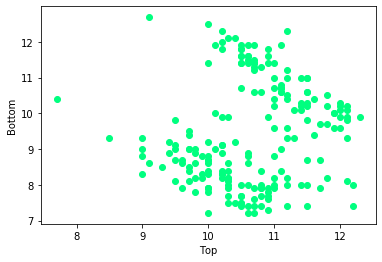

In [11]:
plt.scatter(dataset["Top"], dataset["Bottom"], color = "springgreen")
plt.xlabel('Top')
plt.ylabel('Bottom')
plt.savefig('Top-Bottom.png', transparent=True)
plt.show()

# Dissimilarity matrix

In [12]:
def dist(p1, p2):
    
    x1 = p1[0]
    y1 = p1[1]
    
    x2 = p2[0]
    y2 = p2[1]
    
    a = (x1 - x2)**2
    b = (y1 - y2)**2
    
    euclid = np.sqrt(a + b)
    
    return euclid

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

dm = euclidean_distances(dataset, dataset)
dm

array([[0.        , 2.24276615, 2.27815715, ..., 2.54950976, 3.13687743,
        3.08868904],
       [2.24276615, 0.        , 0.81240384, ..., 3.548239  , 4.47325385,
        3.60416426],
       [2.27815715, 0.81240384, 0.        , ..., 3.39852909, 4.34396133,
        3.59861084],
       ...,
       [2.54950976, 3.548239  , 3.39852909, ..., 0.        , 1.02956301,
        1.06770783],
       [3.13687743, 4.47325385, 4.34396133, ..., 1.02956301, 0.        ,
        1.65529454],
       [3.08868904, 3.60416426, 3.59861084, ..., 1.06770783, 1.65529454,
        0.        ]])

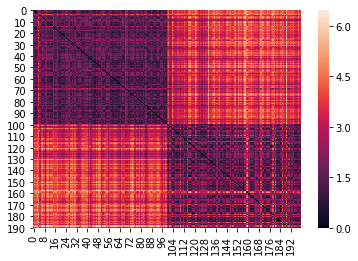

In [14]:
ax = sns.heatmap(dm)

In [15]:
from pyclustertend import vat
from sklearn.preprocessing import scale

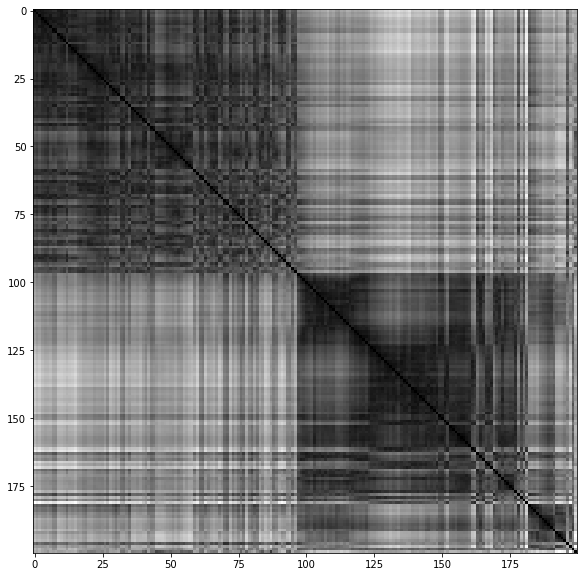

In [16]:
vat(dataset)
plt.savefig('Dissimilarity.png', transparent=True)

In [17]:
from pyclustertend import ivat

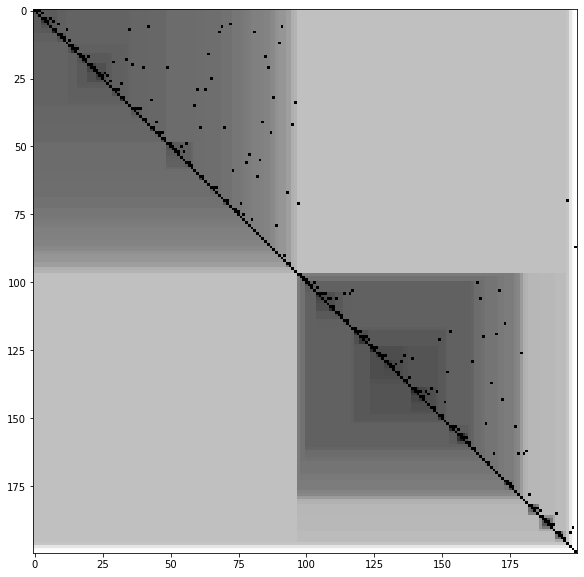

In [18]:
ivat(dataset)


# DBSCAN

In [19]:
from sklearn.neighbors import NearestNeighbors

dataset = pd.read_csv('money.csv')
Mpts = 5 
k = Mpts

dataset = dataset

In [20]:
neighbors = NearestNeighbors(n_neighbors = k).fit(dataset)

distances, indices = neighbors.kneighbors(dataset)

<function matplotlib.pyplot.show(*args, **kw)>

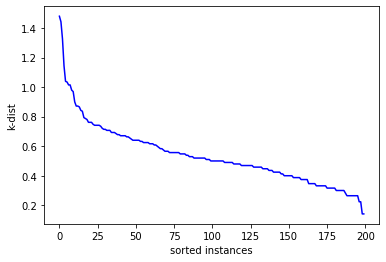

In [21]:
distances = distances[:,1]

distances = np.sort(distances, axis=0)
distances = distances[::-1]

plt.plot(distances, color = 'blue')
plt.xlabel('sorted instances')
plt.ylabel('k-dist')

plt.savefig('k-distance.png', transparent=True)
plt.show

## Parameters

In [22]:
eps = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
MPts = 4
epsilon = 0.6

In [23]:
import sklearn

dataset =  pd.read_csv('money.csv')

cluster = sklearn.cluster.DBSCAN(eps = 0.6, min_samples = 4).fit(dataset)
clusters = cluster.labels_
print(clusters)

num = np.count_nonzero(clusters == 4)
print(num)

dataset.insert(6, "cluster", clusters)
dataset

[-1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1  2 -1 -1  0 -1 -1  1
 -1 -1 -1 -1  0 -1  0 -1  3 -1 -1 -1  1 -1  1 -1 -1 -1  2 -1 -1  0  0  0
  0 -1 -1 -1 -1  0  0  2 -1 -1  0  0  0 -1  0  0  0 -1  0  2  1 -1 -1  0
 -1  0  0  0 -1  3  0  0 -1  3 -1  0 -1  0  1  0 -1  0  0  1  0  0  0  1
 -1  0 -1  0 -1  4 -1 -1  4  4 -1 -1  4 -1 -1  4 -1  4  4 -1  4  4  4  4
  4  4 -1  4 -1  4 -1 -1 -1  4 -1 -1  4  4  4  4  4 -1  4  4  4 -1  4  4
 -1  4  4 -1  4  4  4 -1 -1  4  4  4 -1  4 -1 -1 -1 -1  4  4  4  4 -1 -1
  4  4 -1  4  4 -1  4  4  4  4  4 -1  4 -1  4 -1  4  4 -1  4  4 -1  4 -1
  4 -1  4  4  4  4 -1 -1]
60


,Length,Left,Right,Bottom,Top,Diagonal,cluster
0,214.8,131.0,131.1,9.0,9.7,141.0,-1
1,214.6,129.7,129.7,8.1,9.5,141.7,-1
2,214.8,129.7,129.7,8.7,9.6,142.2,-1
3,214.8,129.7,129.6,7.5,10.4,142.0,0
4,215.0,129.6,129.7,10.4,7.7,141.8,-1
...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,4
196,215.1,130.3,129.9,10.3,11.5,139.7,4
197,214.8,130.3,130.4,10.6,11.1,140.0,4
198,214.7,130.7,130.8,11.2,11.2,139.4,-1


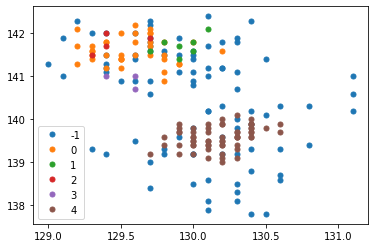

In [24]:
groups = dataset.groupby('cluster')
for name, group in groups:
    plt.plot(group.Right, group.Diagonal, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

# Bar graph

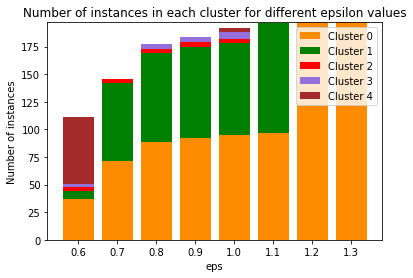

In [25]:
labels = ['0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3']

cluster_0 = np.array([37, 71, 89, 92, 95, 97, 197, 197])
cluster_1 = np.array([7, 71, 80, 83, 83, 99, 0, 0])
cluster_2 = np.array([4, 4, 4, 4, 4, 0, 0, 0])
cluster_3 = np.array([3, 0, 4, 5, 6, 0, 0, 0])
cluster_4 = np.array([60, 0, 0, 0, 4, 0, 0, 0])

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cluster_0, label='Cluster 0', color = 'darkorange')
ax.bar(labels, cluster_1, bottom = cluster_0, label='Cluster 1', color = 'green')
ax.bar(labels, cluster_2, bottom = cluster_0 + cluster_1, label='Cluster 2', color = 'red')
ax.bar(labels, cluster_3, bottom = cluster_0 + cluster_1 + cluster_2, label='Cluster 3', color = 'mediumpurple')
ax.bar(labels, cluster_4, bottom = cluster_0 + cluster_1 + cluster_2 + cluster_3, label='Cluster 4', color = 'brown')

ax.set_ylabel('Number of instances')
ax.set_xlabel('eps')
ax.set_title('Number of instances in each cluster for different epsilon values')
ax.legend()

plt.savefig('bar chart.png', transparent=True)

plt.show()

# Davies Bouldin

In [26]:
sklearn.metrics.davies_bouldin_score(dataset, clusters)

0.8890062899513564

In [27]:
remove = []
for i in range(len(dataset)):

    if clusters[i] == -1:
        remove.append(i)
        
print(remove)
dataset = dataset.drop(remove)
clusters = list(filter(lambda a: a != -1, clusters))

sklearn.metrics.davies_bouldin_score(dataset, clusters)

[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 24, 25, 26, 27, 29, 31, 33, 34, 35, 37, 39, 40, 41, 43, 44, 49, 50, 51, 52, 56, 57, 61, 65, 69, 70, 72, 76, 80, 82, 84, 88, 96, 98, 100, 102, 103, 106, 107, 109, 110, 112, 115, 122, 124, 126, 127, 128, 130, 131, 137, 141, 144, 147, 151, 152, 156, 158, 159, 160, 161, 166, 167, 170, 173, 179, 181, 183, 186, 189, 191, 193, 198, 199]


0.5626721251146353

# DBSCAN - from scratch

In [28]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio
import pandas as pd

#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data.iloc[i] - data.iloc[pointId]) <= radius:
            points.append(i)
    return points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to luster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

In [29]:
dataset =  pd.read_csv('money.csv')
Eps = 0.6
MinPt = 4

DBSCAN = dbscan(dataset, Eps, MinPt)


#Set EPS and Minpoint
epss = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
minpts = 4
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    
    print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
    pointlabel,cl = dbscan(dataset,eps,minpts)
    #plotRes(dataset, pointlabel, cl)
    #plt.show()
    print('number of cluster found: ' + str(cl-1))
    counter=collections.Counter(pointlabel)
    print(counter)
    outliers  = pointlabel.count(0)
    print('numbrer of outliers found: '+str(outliers) +'\n')

Set eps = 0.6, Minpoints = 4
number of cluster found: 5
Counter({0: 89, 5: 60, 1: 37, 2: 7, 3: 4, 4: 3})
numbrer of outliers found: 89

Set eps = 0.7, Minpoints = 4
number of cluster found: 3
Counter({1: 71, 2: 71, 0: 54, 3: 4})
numbrer of outliers found: 54

Set eps = 0.8, Minpoints = 4
number of cluster found: 4
Counter({1: 89, 2: 80, 0: 23, 3: 4, 4: 4})
numbrer of outliers found: 23

Set eps = 0.9, Minpoints = 4
number of cluster found: 4
Counter({1: 92, 2: 83, 0: 16, 4: 5, 3: 4})
numbrer of outliers found: 16

Set eps = 1.0, Minpoints = 4
number of cluster found: 5
Counter({1: 95, 2: 83, 0: 8, 4: 6, 3: 4, 5: 4})
numbrer of outliers found: 8

Set eps = 1.1, Minpoints = 4
number of cluster found: 2
Counter({2: 99, 1: 97, 0: 4})
numbrer of outliers found: 4

Set eps = 1.2, Minpoints = 4
number of cluster found: 1
Counter({1: 197, 0: 3})
numbrer of outliers found: 3

Set eps = 1.3, Minpoints = 4
number of cluster found: 1
Counter({1: 197, 0: 3})
numbrer of outliers found: 3



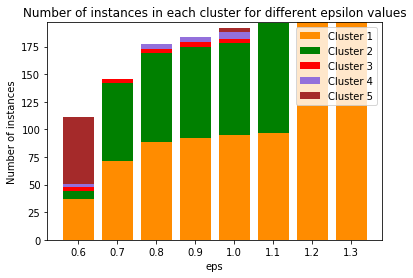

In [30]:
labels = ['0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3']

cluster_1 = np.array([37, 71, 89, 92, 95, 97, 197, 197])
cluster_2 = np.array([7, 71, 80, 83, 83, 99, 0, 0])
cluster_3 = np.array([4, 4, 4, 4, 4, 0, 0, 0])
cluster_4 = np.array([3, 0, 4, 5, 6, 0, 0, 0])
cluster_5 = np.array([60, 0, 0, 0, 4, 0, 0, 0])

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cluster_1, label='Cluster 1', color = 'darkorange')
ax.bar(labels, cluster_2, bottom = cluster_1, label='Cluster 2', color = 'green')
ax.bar(labels, cluster_3, bottom = cluster_1 + cluster_2, label='Cluster 3', color = 'red')
ax.bar(labels, cluster_4, bottom = cluster_1 + cluster_2 + cluster_3, label='Cluster 4', color = 'mediumpurple')
ax.bar(labels, cluster_5, bottom = cluster_1 + cluster_2 + cluster_3 + cluster_4, label='Cluster 5', color = 'brown')

ax.set_ylabel('Number of instances')
ax.set_xlabel('eps')
ax.set_title('Number of instances in each cluster for different epsilon values')
ax.legend()

plt.savefig('bar chart.png', transparent=True)

plt.show()

In [31]:
num = np.count_nonzero(DBSCAN[0] == 0)

print(DBSCAN[0])
print(num)
print(clusters)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 2, 0, 0, 1, 0, 1, 1, 1, 0, 4, 1, 1, 0, 4, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 5, 0, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 0, 5, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 0]
0
[0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [32]:
sklearn.metrics.davies_bouldin_score(dataset, DBSCAN[0])

1.394309362434212

In [33]:
DBSCAN = DBSCAN[0]
print(DBSCAN)

remove = []
for i in range(len(dataset)):

    if DBSCAN[i] == 0:
        remove.append(i)
        
print(remove)
dataset = dataset.drop(remove)
DBSCAN = list(filter(lambda a: a != 0, DBSCAN))

sklearn.metrics.davies_bouldin_score(dataset, DBSCAN)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 2, 0, 0, 1, 0, 1, 1, 1, 0, 4, 1, 1, 0, 4, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 5, 0, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 0, 5, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 0]
[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 24, 25, 26, 27, 29, 31, 33, 34, 35, 37, 39, 40, 41, 43, 44, 49, 50, 51, 52, 56, 57, 61, 65, 69, 70, 72, 76, 80, 82, 84, 88, 96, 98, 100, 102, 103, 106, 107, 109, 110, 112, 115, 122, 124, 126, 127, 128, 130, 131, 137, 141, 144, 147, 151, 152, 156, 158, 159, 160, 161, 166, 167, 170, 173, 179, 181, 183, 186, 189, 191, 193, 198, 199]


0.9821627864925624

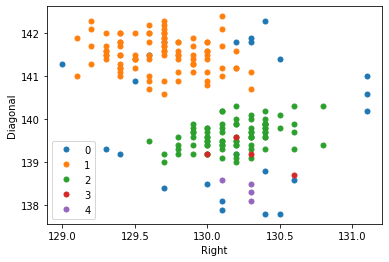

In [46]:
dataset =  pd.read_csv('money.csv')

Eps = 0.8
MinPt = 4

DBSCAN = dbscan(dataset, Eps, MinPt)

dataset.insert(6, "cluster", DBSCAN[0])
dataset

groups = dataset.groupby('cluster')
for name, group in groups:
    plt.plot(group.Right, group.Diagonal, marker='o', linestyle='', markersize=5, label=name)
    
plt.xlabel('Right')
plt.ylabel('Diagonal')
plt.legend()
plt.savefig('eps=1.3.png', transparent=True)

plt.show()

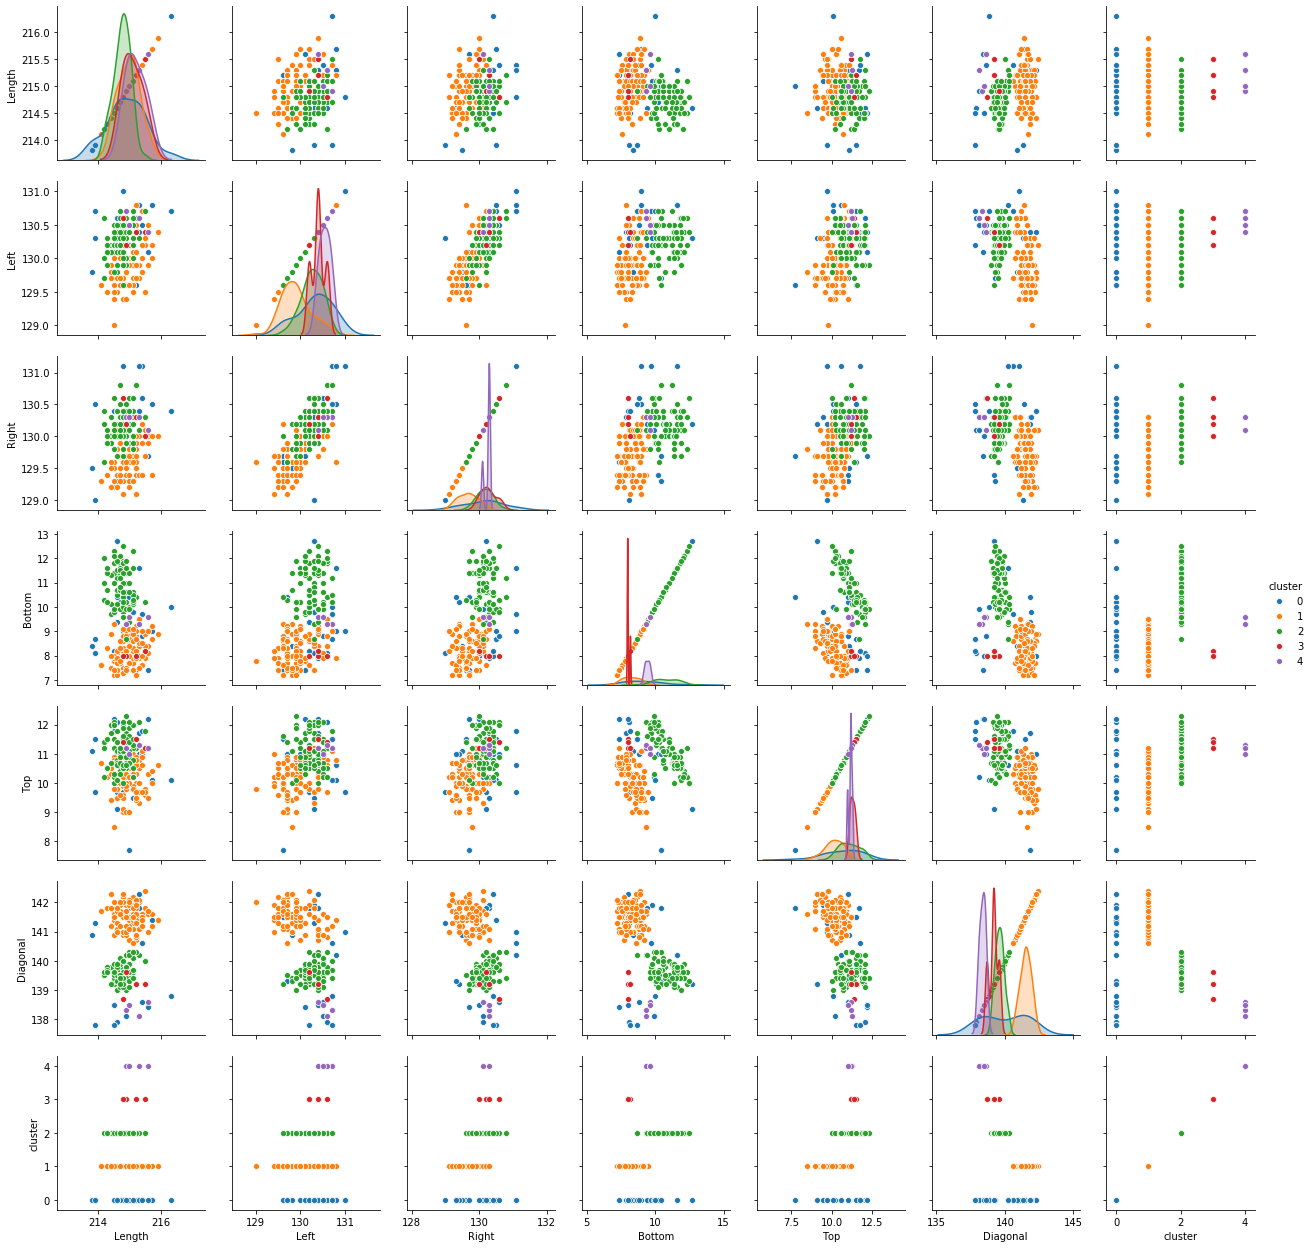

In [47]:
import seaborn as sns

g = sns.pairplot(dataset, hue='cluster')
#g.map_lower(sns.kdeplot, levels=4, color=".3")
g.map(sns.scatterplot)

plt.savefig('Splom2.png', transparent=True)

# Cluster Stability

In [118]:
dataset =  pd.read_csv('money.csv')

Eps = 0.8
MinPt = 4

#DBSCAN = dbscan(dataset, Eps, MinPt)

In [119]:
subset_1 = dataset.sample(200, replace=True)#, random_state = 54)
subset_1

,Length,Left,Right,Bottom,Top,Diagonal
120,214.8,130.3,130.4,10.1,12.1,139.6
188,214.8,129.9,130.2,9.6,11.9,139.4
48,214.6,129.7,129.8,7.9,10.3,141.1
101,214.9,130.5,130.2,11.0,11.5,139.5
134,214.2,130.0,130.2,11.0,11.2,139.5
...,...,...,...,...,...,...
181,214.8,130.6,130.6,8.0,11.4,138.7
195,215.0,130.4,130.3,9.9,12.1,139.6
173,214.8,129.6,130.0,10.4,11.6,139.2
115,215.5,130.4,130.0,8.2,11.2,139.2


In [120]:
DBSCAN_1 = dbscan(subset_1, Eps, MinPt)

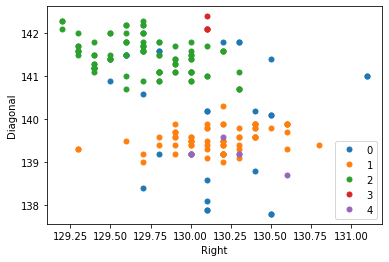

In [121]:
subset_1.insert(6, "cluster", DBSCAN_1[0])
subset_1

groups = subset_1.groupby('cluster')
for name, group in groups:
    plt.plot(group.Right, group.Diagonal, marker='o', linestyle='', markersize=5, label=name)
    
plt.xlabel('Right')
plt.ylabel('Diagonal')
plt.legend()
plt.savefig('subset_1.png', transparent=True)

plt.show()

In [122]:
subset_2 = dataset.sample(200, replace=True)#, random_state = 90)
subset_2

,Length,Left,Right,Bottom,Top,Diagonal
137,214.9,130.7,130.3,9.3,11.2,138.3
128,215.1,130.2,130.2,10.1,11.3,140.3
168,214.8,129.9,129.8,9.6,12.0,139.6
136,214.6,129.8,130.2,10.7,11.1,139.4
39,213.9,130.3,129.0,8.1,9.7,141.3
...,...,...,...,...,...,...
38,215.3,130.3,130.1,8.5,9.3,142.1
94,214.7,129.6,129.5,8.3,10.0,142.0
102,214.9,130.3,130.1,8.7,11.7,140.2
149,214.9,129.9,130.0,9.9,12.3,139.4


In [123]:
DBSCAN_2 = dbscan(subset_2, Eps, MinPt)

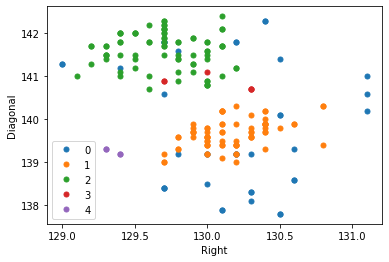

In [124]:
subset_2.insert(6, "cluster", DBSCAN_2[0])
subset_2

groups = subset_2.groupby('cluster')
for name, group in groups:
    plt.plot(group.Right, group.Diagonal, marker='o', linestyle='', markersize=5, label=name)
    
plt.xlabel('Right')
plt.ylabel('Diagonal')
plt.legend()
plt.savefig('subset_2.png', transparent=True)

plt.show()

In [125]:
subset_3 = dataset.sample(200, replace=True)#, random_state = 10)
subset_3

,Length,Left,Right,Bottom,Top,Diagonal
48,214.6,129.7,129.8,7.9,10.3,141.1
138,214.6,130.4,130.4,11.3,10.8,139.8
109,215.2,130.6,130.8,10.4,11.2,140.3
76,214.9,129.9,130.1,8.8,10.0,141.2
139,214.5,130.5,130.2,11.8,10.2,139.6
...,...,...,...,...,...,...
181,214.8,130.6,130.6,8.0,11.4,138.7
45,214.3,129.5,129.4,8.3,10.2,141.8
21,215.6,130.5,130.0,8.1,10.3,141.6
6,215.5,129.5,129.7,7.9,9.6,141.6


In [126]:
DBSCAN_3 = dbscan(subset_3, Eps, MinPt)

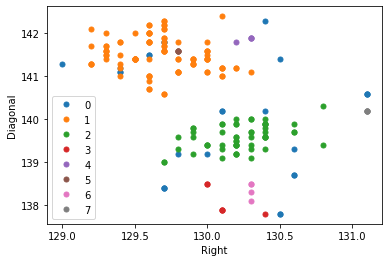

In [127]:
subset_3.insert(6, "cluster", DBSCAN_3[0])
subset_3

groups = subset_3.groupby('cluster')
for name, group in groups:
    plt.plot(group.Right, group.Diagonal, marker='o', linestyle='', markersize=5, label=name)
    
plt.xlabel('Right')
plt.ylabel('Diagonal')
plt.legend()
plt.savefig('subset_3.png', transparent=True)

plt.show()